In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline

In [2]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

from adjustText import adjust_text
from highlight_text import ax_text,fig_text



In [3]:
df = pd.read_csv('goalkeepin2.csv', index_col='Rk')

In [4]:
q2_opa = (df['#OPA']/df['90s']).quantile(0.40)

q3_psxg = df['/90'].quantile(0.40)
q1_psxg = df['/90'].quantile(0.40)

q3_opa = df['#OPA/90'].quantile(0.40)
q1_opa = df['#OPA/90'].quantile(0.40)






Text(-0.05, 0.3, 'MEDIAN VALUE')

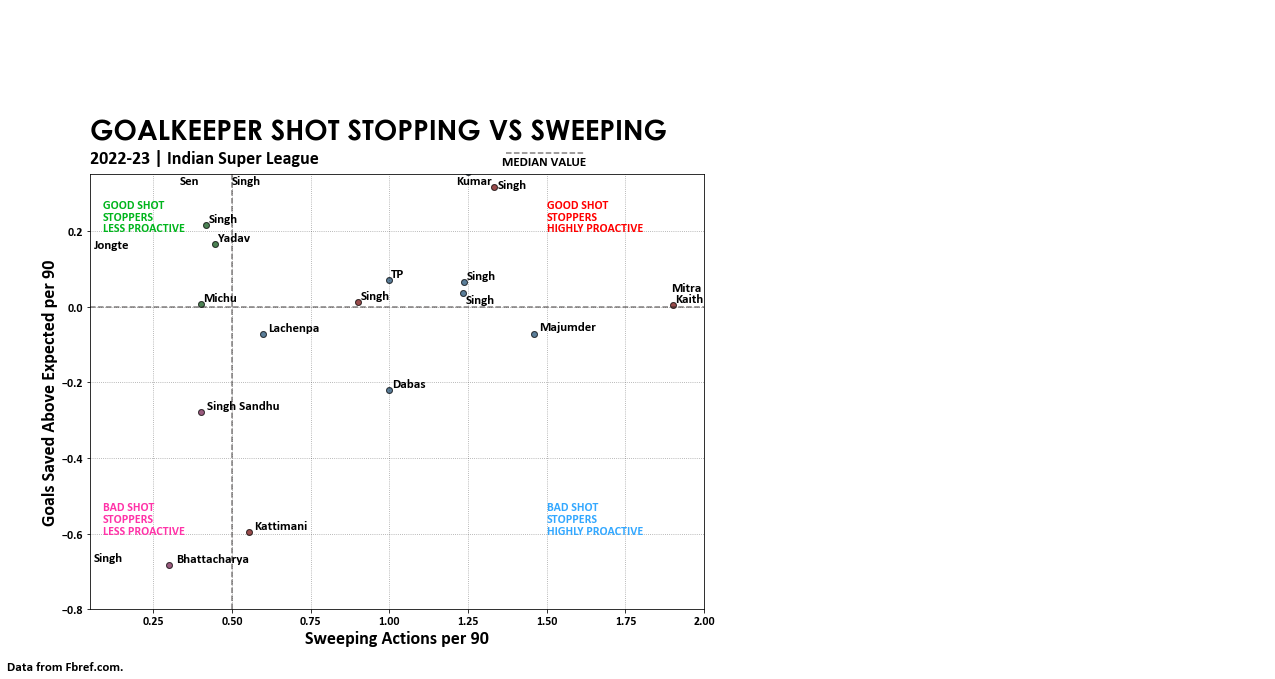

In [7]:
fig, ax = plt.subplots(figsize=(11,8))

# SETTING UP GRID
ax.grid(True, ls=':', alpha=0.4, color='black')
ax.axhline(0, c='#2D2828', alpha=0.6, ls='--')
ax.axvline(q2_opa, c='#2D2828', alpha=0.6, ls='--')

ax.set_xlim(0.05,2)
ax.set_ylim(-0.8,0.35)

# UPPER RIGHT
df_fil = df[(df['#OPA/90']>q2_opa) & (df['/90']>0)]
x, y = (df_fil['#OPA']/df_fil['90s']).tolist(), (df_fil['PsxG+/-']/df_fil['90s']).tolist()
ax.scatter(x, y, c='red', alpha=0.5, edgecolor='black')
ax.text(1.5,0.2,'GOOD SHOT\nSTOPPERS\nHIGHLY PROACTIVE', c='red', size=12)

# UPPER LEFT
df_fil = df[(df['#OPA/90']<=q2_opa) & (df['/90']>0)]
x, y = (df_fil['#OPA']/df_fil['90s']).tolist(), (df_fil['PsxG+/-']/df_fil['90s']).tolist()
ax.scatter(x, y,c='#00B51C', alpha=0.5, edgecolor='black')
ax.text(0.09,0.2,'GOOD SHOT\nSTOPPERS\nLESS PROACTIVE', c='#00B51C', size=12)

# LOWER RIGHT
df_fil = df[(df['#OPA/90']>q2_opa) & (df['/90']<=0)]
x, y = (df_fil['#OPA']/df_fil['90s']).tolist(), (df_fil['PsxG+/-']/df_fil['90s']).tolist()
ax.scatter(x, y,c='#33A8FF', alpha=0.5, edgecolor='black')
ax.text(1.5,-0.6,'BAD SHOT\nSTOPPERS\nHIGHLY PROACTIVE', c='#33A8FF', size=12)

# LOWER LEFT
df_fil = df[(df['#OPA/90']<=q2_opa) & (df['/90']<=0)]
x, y = (df_fil['#OPA']/df_fil['90s']).tolist(), (df_fil['PsxG+/-']/df_fil['90s']).tolist()
ax.scatter(x, y, c='#FF33A8', alpha=0.5, edgecolor='black')
ax.text(0.09,-0.6,'BAD SHOT\nSTOPPERS\nLESS PROACTIVE', c='#FF33A8', size=12)

#LABEL
texts = []
for x, y, time, s in zip(df['#OPA'], df['PsxG+/-'],df['90s'],df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if (x/time)>q3_opa or (x/time)<q1_opa or (y/time)>q3_psxg or (y/time)<q1_psxg:
        ax.scatter(x/time, y/time, c='black', alpha = 0.4)
        texts.append(ax.text(x/time, y/time, name, fontdict=dict(color='black', size=13)))
        
adjust_text(texts,force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))

# TITLES AND LABELS
fig.text(0.125,0.94,'Goalkeeper Shot Stopping vs Sweeping'.upper(), family = 'Century Gothic',
         size = 28, weight='heavy')
fig.text(0.125,0.90,'2022-23 | Indian Super League', size = 18)
ax.set_xlabel('Sweeping Actions per 90', size=18, weight='bold')
ax.set_ylabel('Goals Saved Above Expected per 90', size=18, weight='bold')

fig.text(0.02,0.02,'Data from Fbref.com.', size=13)

ax = fig.add_axes([0.65,0.885,0.1,0.04])
ax.axis('off')
ax.axhline(0.8,c='#2D2828', alpha=0.6, ls='--')
ax.text(-0.05,0.3,'MEDIAN VALUE', size=13)